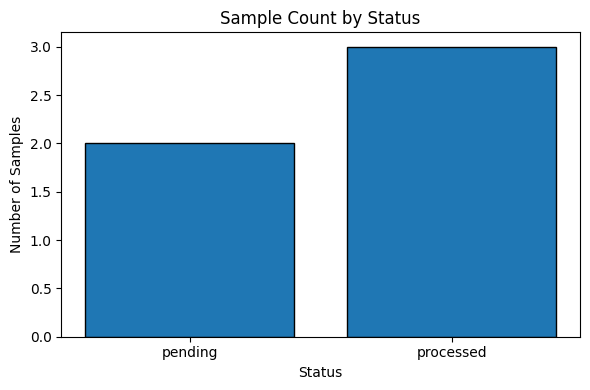

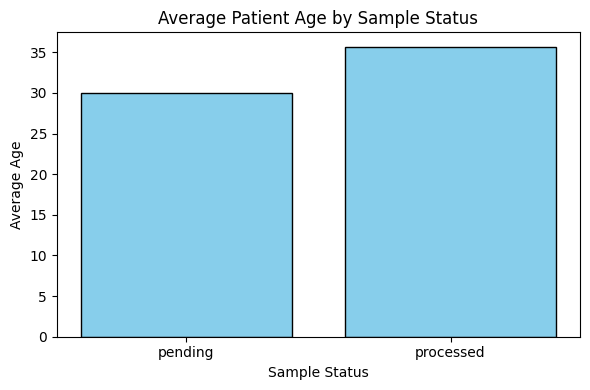

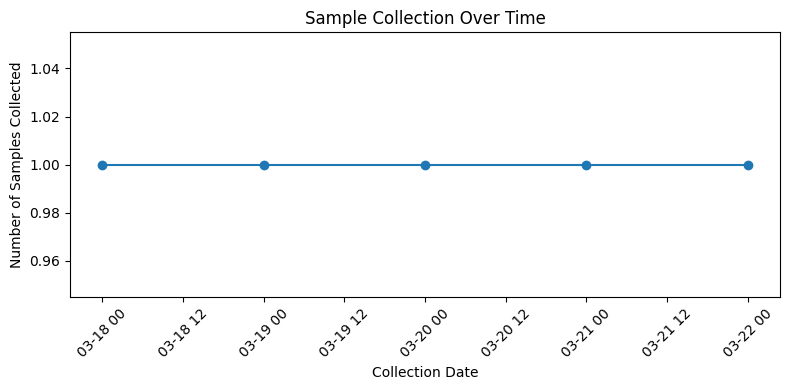

In [1]:
# 🧪 Microbiome Insights Dashboard

# ------------------------------
# 📥 1. Set Up the Database
# ------------------------------
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to or create database
conn = sqlite3.connect("microbiome_db.sqlite")

# Create tables and insert data (if needed)
# TODO: Optional - skip if database already exists

# ------------------------------
# 🔍 2. Query: Sample Count by Status
# ------------------------------
query_status = '''
SELECT status, COUNT(*) AS count
FROM samples
GROUP BY status;
'''
status_df = pd.read_sql_query(query_status, conn)

# ------------------------------
# 📊 3. Visualization: Bar Chart of Sample Status
# ------------------------------
plt.figure(figsize=(6, 4))
plt.bar(status_df['status'], status_df['count'], edgecolor='black')
plt.title('Sample Count by Status')
plt.xlabel('Status')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

# ------------------------------
# 🔍 4. Query: Avg Age by Status
# ------------------------------
query_age = '''
SELECT samples.status, AVG(patients.age) AS avg_age
FROM samples
JOIN patients ON samples.patient_id = patients.patient_id
GROUP BY samples.status;
'''
age_df = pd.read_sql_query(query_age, conn)

# ------------------------------
# 📊 5. Visualization: Avg Age by Status
# ------------------------------
plt.figure(figsize=(6, 4))
plt.bar(age_df['status'], age_df['avg_age'], color='skyblue', edgecolor='black')
plt.title('Average Patient Age by Sample Status')
plt.xlabel('Sample Status')
plt.ylabel('Average Age')
plt.tight_layout()
plt.show()

# ------------------------------
# 🔍 6. Query: Sample Collection Timeline
# ------------------------------
query_timeline = '''
SELECT collection_date, COUNT(*) AS num_samples
FROM samples
GROUP BY collection_date
ORDER BY collection_date;
'''
timeline_df = pd.read_sql_query(query_timeline, conn)
timeline_df['collection_date'] = pd.to_datetime(timeline_df['collection_date'])

# ------------------------------
# 📈 7. Visualization: Timeline Plot
# ------------------------------
plt.figure(figsize=(8, 4))
plt.plot(timeline_df['collection_date'], timeline_df['num_samples'], marker='o')
plt.title('Sample Collection Over Time')
plt.xlabel('Collection Date')
plt.ylabel('Number of Samples Collected')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

            city  num_samples
0        Seattle            2
1  San Francisco            1
2        Chicago            1
3         Boston            1


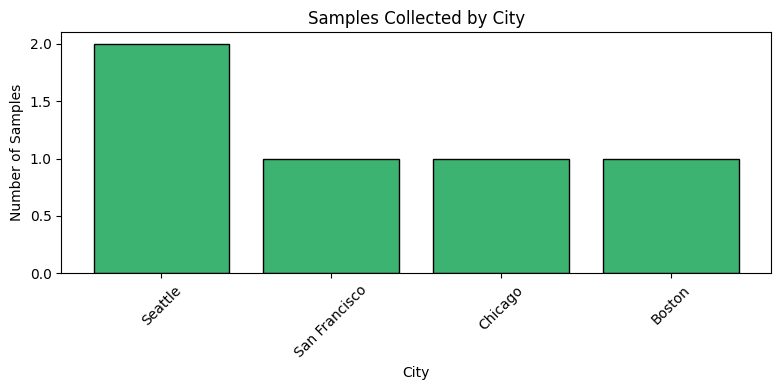

In [6]:
query_city = '''
SELECT patients.city, COUNT(samples.sample_id) as num_samples
FROM samples
JOIN patients ON samples.patient_id = patients.patient_id
GROUP by patients.city
ORDER by num_samples DESC;
'''

city_df = pd.read_sql_query(query_city, conn)
print(city_df)

plt.figure(figsize=(8, 4))
plt.bar(city_df['city'], city_df['num_samples'], color='mediumseagreen', edgecolor='black')

plt.title('Samples Collected by City')
plt.xlabel('City')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
